<a href="https://colab.research.google.com/github/Charlybru/Datasets-for-Python-/blob/main/ProyectoDS_ParteI_Brunettic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análisis de factores que influyen en la puntualidad de entrega de productos en una empresa de envíos



En la era del comercio electrónico actual, la puntualidad en la entrega de productos juega un papel crucial en la satisfacción del cliente y la competitividad de las empresas. En este estudio, se analiza un dataset recopilado de una empresa de envíos que incluye información sobre el método de envío, el bloque del almacén, las llamadas al servicio de atención al cliente, entre otros factores, con el objetivo de identificar los principales determinantes de la puntualidad en la entrega.
La hipótesis principal planteada es que varios factores, como el método de envío, el bloque del almacén y la cantidad de llamadas al servicio de atención al cliente, están relacionados con la puntualidad en la entrega de productos. Se espera que los productos enviados mediante métodos más rápidos, desde bloques de almacén mejor organizados y con menor número de llamadas al servicio de atención al cliente, tengan una mayor probabilidad de llegar a tiempo.
Para probar estas hipótesis, se llevará a cabo un análisis exploratorio de datos utilizando herramientas de Python, como Pandas y NumPy, para manipular y visualizar el dataset. Se realizarán gráficos y estadísticas descriptivas para examinar las distribuciones de las variables y las relaciones entre ellas. Además, se utilizarán pruebas de hipótesis estadísticas para determinar si existen diferencias significativas en la puntualidad de entrega en función de los diferentes niveles de los factores analizados.
Los resultados de este estudio tienen el potencial de proporcionar información valiosa para la empresa de envíos, ayudándoles a identificar áreas de mejora en su proceso de entrega y optimizar la satisfacción del cliente. Además, podría tener implicaciones más amplias para otras empresas del sector logístico interesadas en mejorar la eficiencia de sus operaciones de entrega de productos.

Me propuse plantear las siguientes hipótesis para analizar la eficacia y los factores que influyen en la puntualidad de entrega de los productos:

1) Método de envío, importancia del producto y puntualidad: Los envíos realizados a través del metodo por aire, tendran mayor porcentaje de envios con puntualidad en comparación con los enviados por ruta o barco. Ademas, voy a incluir la importancia del producto como factor para hacer un estudio bivariado.

2) Bloque del almacén y puntualidad: Los productos almacenados en ciertos bloques del almacén pueden tener una mayor probabilidad de ser enviados a tiempo en comparación con los productos almacenados en otros bloques, posiblemente debido a diferencias en la organización o acceso.

3) Número de llamadas al servicio de atención al cliente: Los productos asociados con un menor número de llamadas al servicio de atención al cliente pueden tener una mayor probabilidad de llegar a tiempo, sugiriendo una relación entre la satisfacción del cliente y la puntualidad en la entrega.


In [80]:
import pandas as pd


In [81]:
url = 'https://raw.githubusercontent.com/Charlybru/Datasets-for-Python-/main/ecommerce.csv'

In [82]:
Data = pd.read_csv(url)

In [83]:
Data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [84]:
import matplotlib.pyplot as plt

In [85]:
import seaborn as sns

**Vamos a graficar el total de envios, los envios a tiempo y los que no llegron a tiempo para tener una idea de la relación entre ellos.**

In [86]:
total_envios = len(Data)

<BarContainer object of 1 artists>

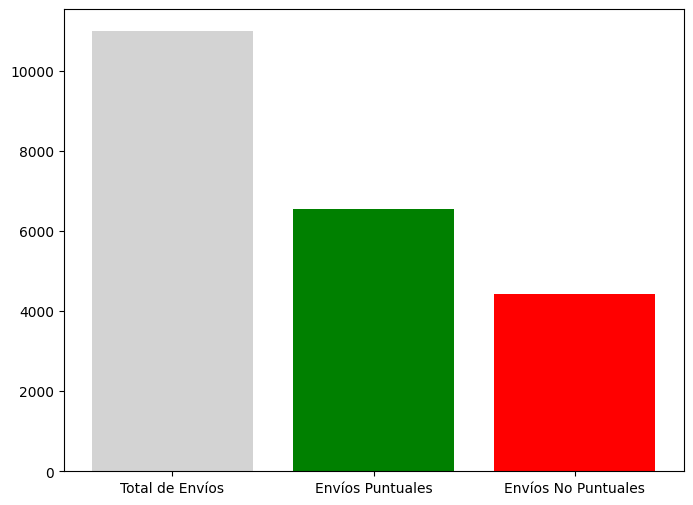

In [87]:
plt.figure(figsize=(8, 6))
plt.bar('Total de Envíos', total_envios, color='lightgray')
plt.bar('Envíos Puntuales', len(Data[Data['Reached.on.Time_Y.N'] == 1]), color='green')
plt.bar('Envíos No Puntuales', len(Data[Data['Reached.on.Time_Y.N'] == 0]), color='red')

**Se grafican los pedidos que llegaron a tiempo por bloque de almacen**

In [88]:
envios_a_tiempo = Data[Data['Reached.on.Time_Y.N'] == 1]

In [89]:
filtro_bloque_a_tiempo = envios_a_tiempo['Warehouse_block'].value_counts()

In [90]:
Total_a_tiempo = Data['Warehouse_block'].value_counts()

In [91]:
proporcion_a_tiempo = filtro_bloque_a_tiempo / Total_a_tiempo

In [49]:
proporcion_a_tiempo = proporcion_a_tiempo.sort_index()

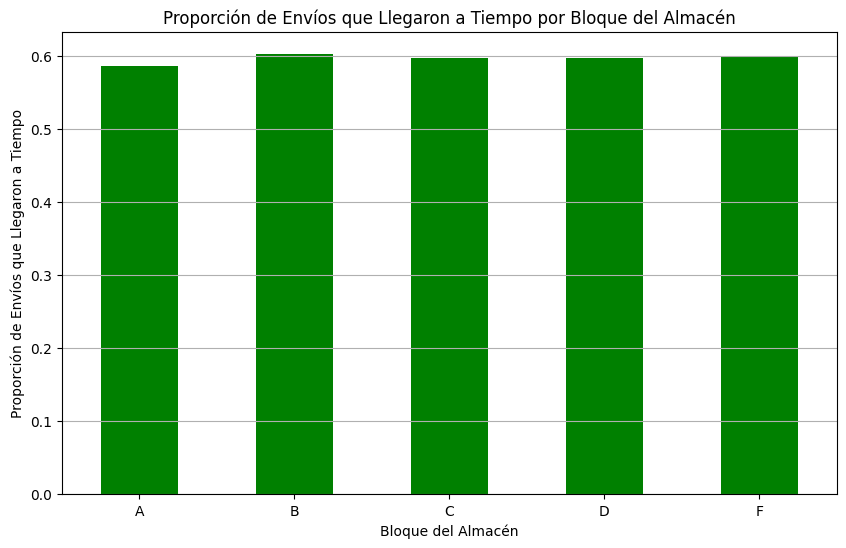

In [92]:
plt.figure(figsize=(10, 6))
proportion_on_time.plot(kind='bar', color='green')
plt.title('Proporción de Envíos que Llegaron a Tiempo por Bloque del Almacén')
plt.xlabel('Bloque del Almacén')
plt.ylabel('Proporción de Envíos que Llegaron a Tiempo')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Se puede observar que la ubicación de los productos en los distintos bloques del almacen no influyen en la puntualidad de la recepcion del envio de los productos hacia los usuarios dado que, la proporción de envios que llegaron a tiempo es ampliamente homogenea entre los bloques. Por lo tanto, esta probabilidad queda desmentida y no es un punto a mejorar en la organización.

In [93]:
envios_fuera_de_tiempo = Data[Data['Reached.on.Time_Y.N'] == 0]

In [94]:
Filtro_bloque_no_a_tiempo = envios_fuera_de_tiempo['Warehouse_block'].value_counts()

In [95]:
proporcion_no_a_tiempo = Filtro_bloque_no_a_tiempo / envios_fuera_de_tiempo

In [96]:
proportion_not_on_time = proportion_not_on_time.sort_index()

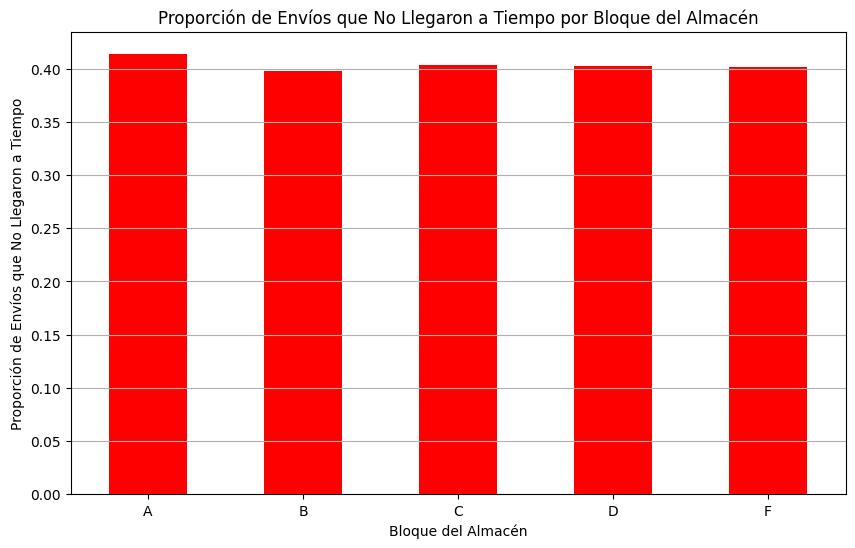

In [97]:
plt.figure(figsize=(10, 6))
proportion_not_on_time.plot(kind='bar', color='red')
plt.title('Proporción de Envíos que No Llegaron a Tiempo por Bloque del Almacén')
plt.xlabel('Bloque del Almacén')
plt.ylabel('Proporción de Envíos que No Llegaron a Tiempo')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Caso inverso pero evidente es que las impuntualidades no se ven influenciadas por la ubicación del producto en los diferentes bloques del almacen.

In [98]:
A_tiempo_x_importancia = envios_a_tiempo.groupby(['Mode_of_Shipment', 'Product_importance']).size()

In [99]:
Total_a_tiempo = Data.groupby(['Mode_of_Shipment', 'Product_importance']).size()

In [100]:
proportion_a_tiempo = A_tiempo_x_importancia / Total_a_tiempo

In [101]:
proporcion_Data = proportion_a_tiempo.unstack()

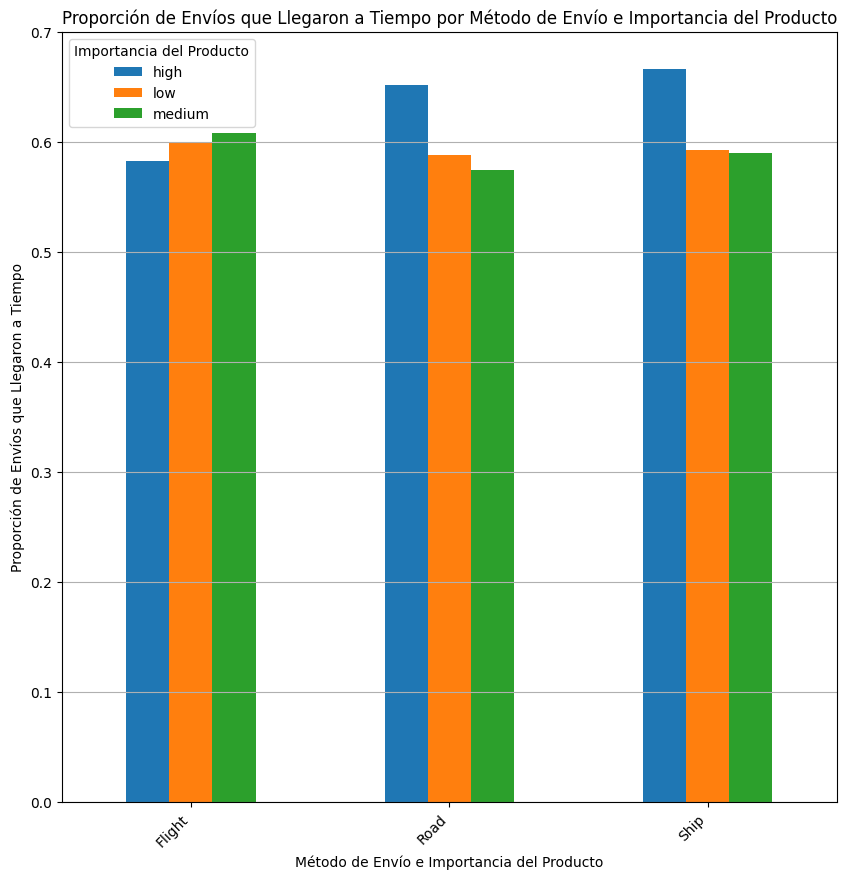

In [102]:
proporcion_Data.plot(kind='bar', figsize=(10, 10))
plt.title('Proporción de Envíos que Llegaron a Tiempo por Método de Envío e Importancia del Producto')
plt.xlabel('Método de Envío e Importancia del Producto')
plt.ylabel('Proporción de Envíos que Llegaron a Tiempo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Importancia del Producto')
plt.grid(axis='y')
plt.show()

Aunque no haya una gran diferencia en la proporción de envios puntuales en base a la importancia del producto y el metodo de envio, podemos decir que los que viajaron por tierra y por barco, tuvieron una eficiencia mayor de los que fueron por aire. aunque sea simple de visualizar esto, es importante de destacar ya que, para aquellos envios por aire en los cuales habia posibilidad de enviarlos por tierra, se hubiese ahorrado un costo logistico grande y esto beneficia mucho al numero de la empresa.
Queda decir tambien, que el metodo de envio y la importancia del producto, tienen un impacto medio en la puntualidad de llegada y no es tan critico como pensaba al plantear la hipotesis, sin embargo para optimizar el impacto de puntualidad de los envios total, se deberia trabajar un poco en mejorar la logistica de envios por aire.

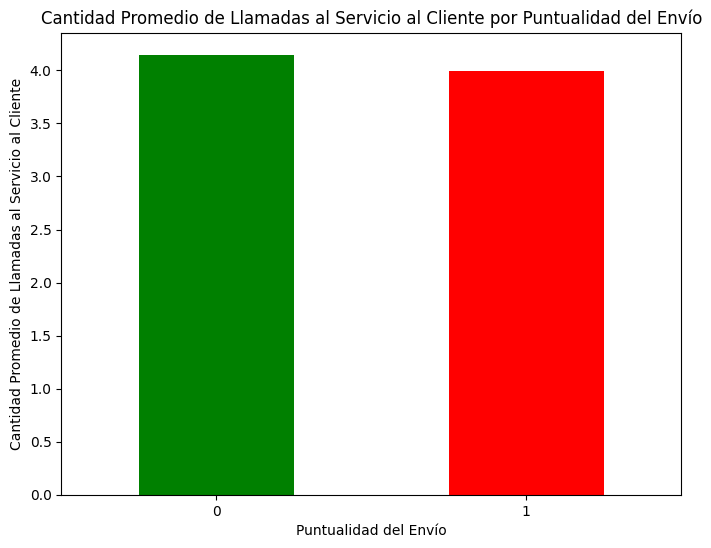

In [103]:
grouped_data = Data.groupby('Reached.on.Time_Y.N')['Customer_care_calls'].mean()

plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=['green', 'red'])
plt.title('Cantidad Promedio de Llamadas al Servicio al Cliente por Puntualidad del Envío')
plt.xlabel('Puntualidad del Envío')
plt.ylabel('Cantidad Promedio de Llamadas al Servicio al Cliente')
plt.xticks(rotation=0)  # Ajustamos la rotación de los ticks del eje x
plt.show()



En este gráfico de barras, la barra verde representa la cantidad promedio de llamadas al servicio al cliente para los envíos puntuales, mientras que la barra roja representa la cantidad promedio de llamadas al servicio al cliente para los envíos no puntuales. Esto nos permite observar que no hay un impacto directo en los llamados de los clientes en la puntualidad del envio.

###planteo una 4ta hipotesis y analizo el numero de descuento ofrecido

<ipython-input-130-2787b25aa811>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=Data, palette=['red', 'blue'])


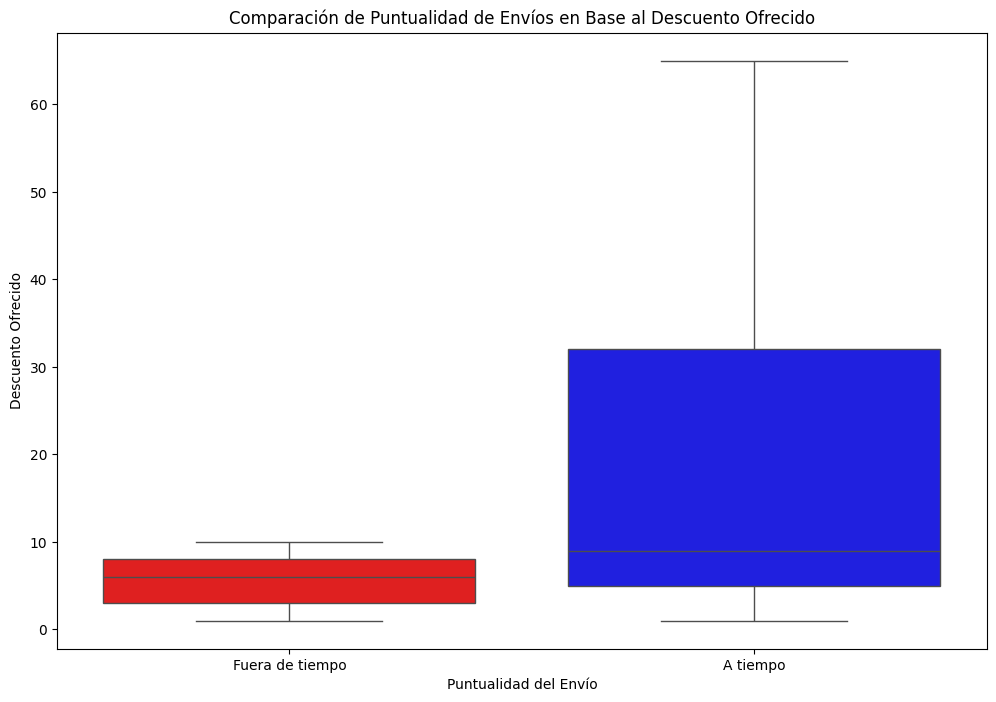

In [130]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=Data, palette=['red', 'blue'])
plt.title('Comparación de Puntualidad de Envíos en Base al Descuento Ofrecido')
plt.xlabel('Puntualidad del Envío')
plt.ylabel('Descuento Ofrecido')
plt.xticks([1, 0], ['A tiempo', 'Fuera de tiempo'])  # Cambiar etiquetas del eje x
plt.show()

Si observamos la linea horizontal de cada caja que marca la mediana de ambas categorias de puntualidad, se puede decir que el valor central de los que estuvieron fuera de tiempo se encuentra cerca del valor 5 y los de a tiempo cerca del valor de 10, esto implica que la envios que no llegaron a tiempo tuvieron un menor numero de descuento.

Por otro lado, el alto de la caja representa el IQR, que cubre el 50% central de los datos y en base a esta altura podemos decir que los pedidos a tiempo tienen una mayor variabilidad de descuentos y si le agregamos lo analizado en la mediana, podemos decir que los productos con un numero de descuento mayor a 10 tienen mayor probabilidad de llegar a tiempo.

Ademas, si observamos los bigotes acompaña lo anterior dicho. Se observa la gran variabildiad de descuentros altos mas alla del IQR.

# Conclusión

Se puede observar que dadas las hipotesis planteadas para analizar la puntualidad de los envios, la que mayor relevancia tuvo fue la de comparar y ver el impacto en la puntualidad en base al modo de envio de los productos y la importancia de los mismos. Esto fue es de interes ya que, deja en evidencia que el flujo de la logistica de envios por aire debe reevaluarse y mejorarse. Ademas que, desde el punto de vista de costos y ahorro, los envios que puedan evitarse enviar por este medio y puedan ser absorvido por tierra o agua generaran una menor perdida de dinero a la empresa y potencial insatisfacción de un cliente al no recibir su pedido de forma puntual.


Se analizo una 4ta hipotesis que no fue planteada inicialmente para poder identificar si el numero de descuento ofrecido tiene una relacion lineal con los productos que llegaron a tiempo y los que no hacia los clientes. Con el grafico obtenido y con algunas definiones de lo que significa un boxplot y estadistica puede intepretarse que en temporada de descuentos, la empresa pone foco en ofrecer un mayor soporte en la calidad del envio para aquellos productos que tienen un numero mayor de descuento esto puede entender que es asi para generar satisfacción mayor en los usuarios que eligieron esta empresa. Si bien esto es bueno, si se quiere evitar la perdida de clientes y potenciales, deberian hacer foco en aquellos los cuales por mas que tengan un % bajo de descuento no llegaron a tiempo.







